In [1]:
# install.packages("data.table", "./Rpackages")
install.packages("sf", "./Rpackages")

In [2]:
library(data.table, lib.loc = "./Rpackages")
library(sf, lib.loc = "./Rpackages")

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE



In [3]:
lucas_raw <- read.csv("./in_data/LUCAS/EU_2018_20200213.csv")

In [4]:
dim(lucas_raw)

[1] 337855     97

In [5]:
names(lucas_raw)

[1] "POINT_ID"             "NUTS0"                "NUTS1"               
 [4] "NUTS2"                "NUTS3"                "TH_LAT"              
 [7] "TH_LONG"              "OFFICE_PI"            "EX_ANTE"             
[10] "SURVEY_DATE"          "CAR_LATITUDE"         "CAR_EW"              
[13] "CAR_LONGITUDE"        "GPS_PROJ"             "GPS_PREC"            
[16] "GPS_ALTITUDE"         "GPS_LAT"              "GPS_EW"              
[19] "GPS_LONG"             "OBS_DIST"             "OBS_DIRECT"          
[22] "OBS_TYPE"             "LC1"                  "LC1_SPEC"            
[25] "LC1_PERC"             "LC2"                  "LC2_SPEC"            
[28] "LC2_PERC"             "LU1"                  "LU1_TYPE"            
[31] "LU1_PERC"             "LU2"                  "LU2_TYPE"            
[34] "LU2_PERC"             "PARCEL_AREA_HA"       "TREE_HEIGHT_SURVEY"  
[37] "TREE_HEIGHT_MATURITY" "FEATURE_WIDTH"        "LNDMNG_PLOUGH"       
[40] "LM_PLOUGH_SLOPE"      "LM_PLOUGH_DIRECT"     "LM_STONE_WALLS"      
[43] "CROP_RESIDUES"        "LM_GRASS_MARGINS"     "GRAZING"             
[46] "SPECIAL_STATUS"       "LC_LU_SPECIAL_REMARK" "CPRN_CANDO"          
[49] "CPRN_LC"              "CPRN_LC1N"            "CPRNC_LC1E"          
[52] "CPRNC_LC1S"           "CPRNC_LC1W"           "CPRN_LC1N_BRDTH"     
[55] "CPRN_LC1E_BRDTH"      "CPRN_LC1S_BRDTH"      "CPRN_LC1W_BRDTH"     
[58] "CPRN_LC1N_NEXT"       "CPRN_LC1E_NEXT"       "CPRN_LC1S_NEXT"      
[61] "CPRN_LC1W_NEXT"       "CPRN_URBAN"           "CPRN_IMPERVIOUS_PERC"
[64] "INSPIRE_PLCC1"        "INSPIRE_PLCC2"        "INSPIRE_PLCC3"       
[67] "INSPIRE_PLCC4"        "INSPIRE_PLCC5"        "INSPIRE_PLCC6"       
[70] "INSPIRE_PLCC7"        "INSPIRE_PLCC8"        "EUNIS_COMPLEX"       
[73] "GRASSLAND_SAMPLE"     "GRASS_CANDO"          "WM"                  
[76] "WM_SOURCE"            "WM_TYPE"              "WM_DELIVERY"         
[79] "EROSION_CANDO"        "SOIL_STONES_PERC"     "BIO_SAMPLE"          
[82] "SOIL_BIO_TAKEN"       "BULK0_10_SAMPLE"      "SOIL_BLK_0_10_TAKEN" 
[85] "BULK10_20_SAMPLE"     "SOIL_BLK_10_20_TAKEN" "BULK20_30_SAMPLE"    
[88] "SOIL_BLK_20_30_TAKEN" "STANDARD_SAMPLE"      "SOIL_STD_TAKEN"      
[91] "ORGANIC_SAMPLE"       "SOIL_ORG_DEPTH_CANDO" "PHOTO_POINT"         
[94] "PHOTO_NORTH"          "PHOTO_EAST"           "PHOTO_SOUTH"         
[97] "PHOTO_WEST"

In [6]:
table(lucas_raw$LC1_SPEC)


            8   B19a   B19b   B19c   B19d   B19f   B19h   B23a   B23b   B23c 
     1 213299    115    195     45      4      8     30     31     34     10 
  B23d   B23e   B23f   B23g   B23h   B23k   B23m   B23n   B35a   B35b   B35c 
    93     21      2     10      3      3      1    233    157     21     35 
  B35d   B35e   B35f   B35k   B35l   B35n   B37a   B37b   B37c   B37d   B37e 
   135      3      1      1      2     52     11     15     16     63      2 
  B37f   B37z   B43a   B43b   B43c   B43e   B43g   B43h   B43z   B53a   B53b 
    58      1    166    225     82    218      1    142      4     65     13 
  B53c   B53d   B53e   B53g   B53h   B53i   B53j   B53k   B53z   B75a   B75c 
     8     12      2      4     58     25     35    983      1     64     45 
  B75d   B75e   B75f   B75g   B75h   B75i   B75j   B75k   B75l   B75n   B75o 
     2     15      2      3     23    109      4    201     10      3      4 
  B75p   B75q   B75r   B75z   B77a   B77d   B77e   B77f   B77g 

In [12]:
table(substr(lucas_raw$LC1,1,1) == "C")


FALSE  TRUE 
16023  7064 

In [12]:
head(lucas_raw[,c('OBS_TYPE','LC1','LC1_SPEC','LC1_PERC','LC2','LC2_SPEC','LC2_PERC','LU1','LU1_TYPE','LU1_PERC','LU2','LU2_TYPE','LU2_PERC','PARCEL_AREA_HA','TREE_HEIGHT_SURVEY','TREE_HEIGHT_MATURITY','FEATURE_WIDTH')])

,OBS_TYPE,LC1,LC1_SPEC,LC1_PERC,LC2,LC2_SPEC,LC2_PERC,LU1,LU1_TYPE,LU1_PERC,LU2,LU2_TYPE,LU2_PERC,PARCEL_AREA_HA,TREE_HEIGHT_SURVEY,TREE_HEIGHT_MATURITY,FEATURE_WIDTH
,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,E20,8,100,8,8,0,U111,8,100,8,8,0,3,8,8,8
2,1,E20,8,100,8,8,0,U111,8,100,8,8,0,4,8,8,8
3,1,B16,8,80,E30,8,20,U111,8,100,8,8,0,4,8,8,8
4,3,E20,8,100,8,8,0,U111,8,100,8,8,0,3,8,8,8
5,1,A12,8,100,8,8,0,U370,8,100,8,8,0,1,8,8,8
6,1,C21,C21A,100,8,8,88888,U120,8,100,8,8,88888,5,2,2,2


In [8]:
a <- st_as_sf(lucas_raw[!is.na(lucas_raw$TH_LAT), c('SURVEY_DATE', 'TH_LAT','TH_LONG','LC1', 'LC1_PERC', 'LC2', 'LC2_PERC')], coords=c("TH_LONG","TH_LAT"), crs= "+proj=longlat")

a$forest <- substr(a$LC1,1,1) == "C"
a$forestperc <- NA
a$forestperc[substr(a$LC1,1,1) == "C"] <- a$LC1_PERC[substr(a$LC1,1,1) == "C"] 
a$forestperc[substr(a$LC2,1,1) == "C"] <- a$LC2_PERC[substr(a$LC2,1,1) == "C"] 


In [9]:
table(substr(a$SURVEY_DATE, 7,8))


    18     19 
337657    197 

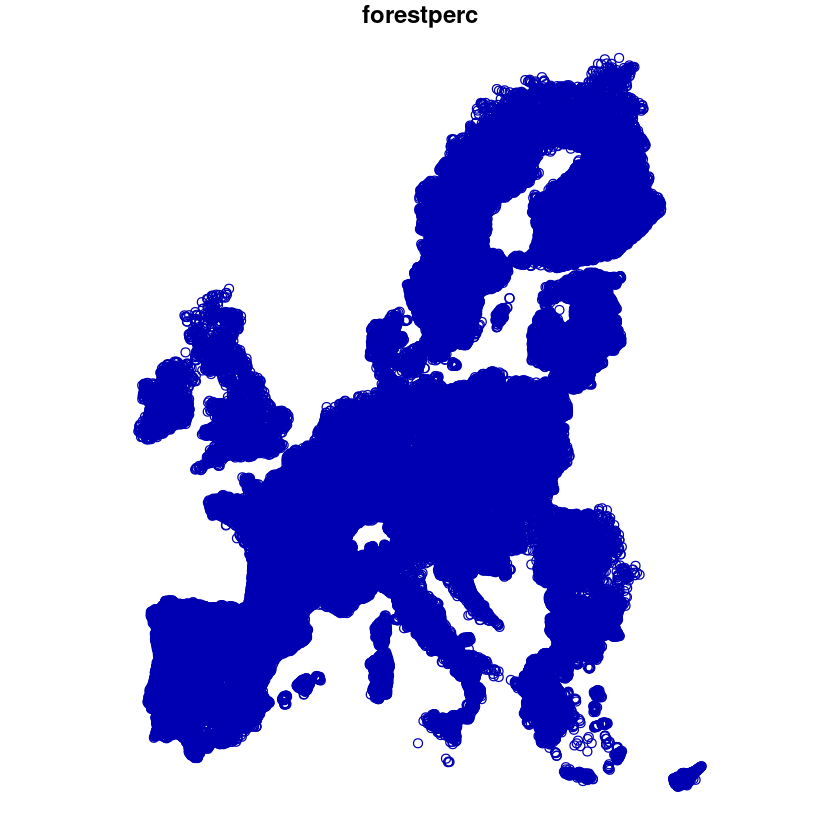

In [10]:
plot(a[a$forest,'forestperc'])

In [11]:
st_write(a, './in_data/LUCAS/LUCAS_forest_EU.geojson')

Writing layer `LUCAS_forest_EU' to data source 
  `./in_data/LUCAS/LUCAS_forest_EU.geojson' using driver `GeoJSON'
Writing 337854 features with 7 fields and geometry type Point.
